<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/011_Dtw_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 11: Dtw Loss Function

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
print(tf.__version__)

2.6.0


In [3]:
import os
def loadThumb(path):
  # Let's import this video thumbnail!
  if os.path.exists(path):
    myThumb = plt.imread(path)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.axis('off')
    ax.imshow(myThumb)
    plt.show()

loadThumb('/tmp/yt_thumb_011.png')


## Creating DTW Loss Function


---



In [4]:
class DtwLoss(tf.keras.losses.Loss):
    def __init__(self, batch_size: int = 32):
        super(DtwLoss, self).__init__()
        self.batch_size = batch_size

    def call(self, y_true, y_pred):
        tmp = []
        for item in range(self.batch_size):
            tf.print(f'Working on batch: {item}\n')
            s = y_true[item, :]
            t = y_pred[item, :]
            n, m = len(s), len(t)
            dtw_matrix = []
            for i in range(n + 1):
                line = []
                for j in range(m + 1):
                    if i == 0 and j == 0:
                        line.append(0)
                    else:
                        line.append(np.inf)
                dtw_matrix.append(line)

            for i in range(1, n + 1):
                for j in range(1, m + 1):
                    cost = tf.abs(s[i - 1] - t[j - 1])
                    last_min = tf.reduce_min([dtw_matrix[i - 1][j], dtw_matrix[i][j - 1], dtw_matrix[i - 1][j - 1]])
                    dtw_matrix[i][j] = tf.cast(cost, dtype=tf.float32) + tf.cast(last_min, dtype=tf.float32)

            temp = []
            for i in range(len(dtw_matrix)):
                temp.append(tf.stack(dtw_matrix[i]))

            tmp.append(tf.stack(temp)[n, m])
        return tf.reduce_mean(tmp)

In [5]:
x = tf.Variable(np.cos(np.linspace(0, 360)*3.14/180).reshape(1, -1))
y = tf.Variable(np.sin(np.linspace(0, 360)*3.14/180).reshape(1, -1))

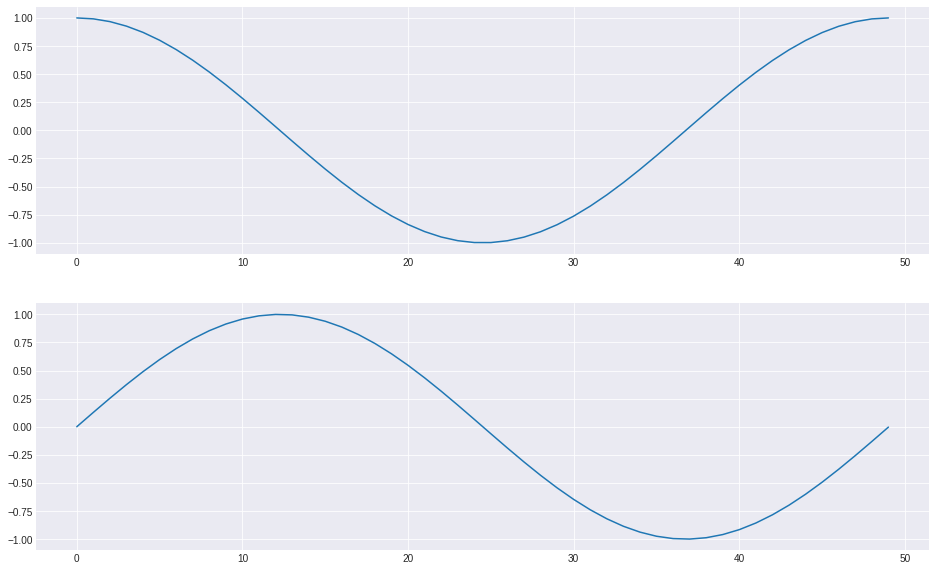

In [6]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10))
axs[0].plot(x.numpy().reshape(-1))
axs[1].plot(y.numpy().reshape(-1))
plt.show()

In [7]:
loss = DtwLoss(batch_size=1)
print(f'Loss value: {loss(x, y).numpy()}')

Working on batch: 0

Loss value: 13.70205307006836


## Basic Stacked Autoencoder Implementation


---



In [8]:
# Encoder
input = tf.keras.layers.Input(shape=(x.shape[1]))
dense_1 = tf.keras.layers.Dense(10, activation='relu')(input)
encoder = tf.keras.models.Model(inputs=input, outputs=dense_1)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Decoder
input = tf.keras.layers.Input(shape=(10))
dense_1 = tf.keras.layers.Dense(x.shape[1], activation='linear')(input)
decoder = tf.keras.models.Model(inputs=input, outputs=dense_1)
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________


In [10]:
# AE
model = tf.keras.models.Sequential([
                                    encoder,
                                    decoder
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 10)                510       
_________________________________________________________________
model_1 (Functional)         (None, 50)                550       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________


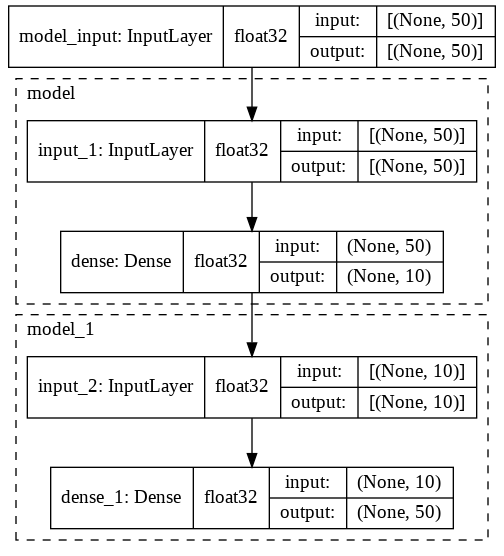

In [11]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=DtwLoss(batch_size=1))

In [24]:
model.fit(x.numpy(), x.numpy(), epochs=10)

Epoch 1/10
Working on batch: 0

1/1 [==============================] - 0s 428ms/step - loss: 0.2205
Epoch 2/10
Working on batch: 0

1/1 [==============================] - 0s 448ms/step - loss: 0.2310
Epoch 3/10
Working on batch: 0

1/1 [==============================] - 0s 456ms/step - loss: 0.2220
Epoch 4/10
Working on batch: 0

1/1 [==============================] - 0s 412ms/step - loss: 0.2207
Epoch 5/10
Working on batch: 0

1/1 [==============================] - 0s 430ms/step - loss: 0.2232
Epoch 6/10
Working on batch: 0

1/1 [==============================] - 0s 444ms/step - loss: 0.2237
Epoch 7/10
Working on batch: 0

1/1 [==============================] - 0s 408ms/step - loss: 0.2081
Epoch 8/10
Working on batch: 0

1/1 [==============================] - 0s 409ms/step - loss: 0.2249
Epoch 9/10
Working on batch: 0

1/1 [==============================] - 0s 412ms/step - loss: 0.2208
Epoch 10/10
Working on batch: 0

1/1 [==============================] - 0s 412ms/step - loss: 0.2261

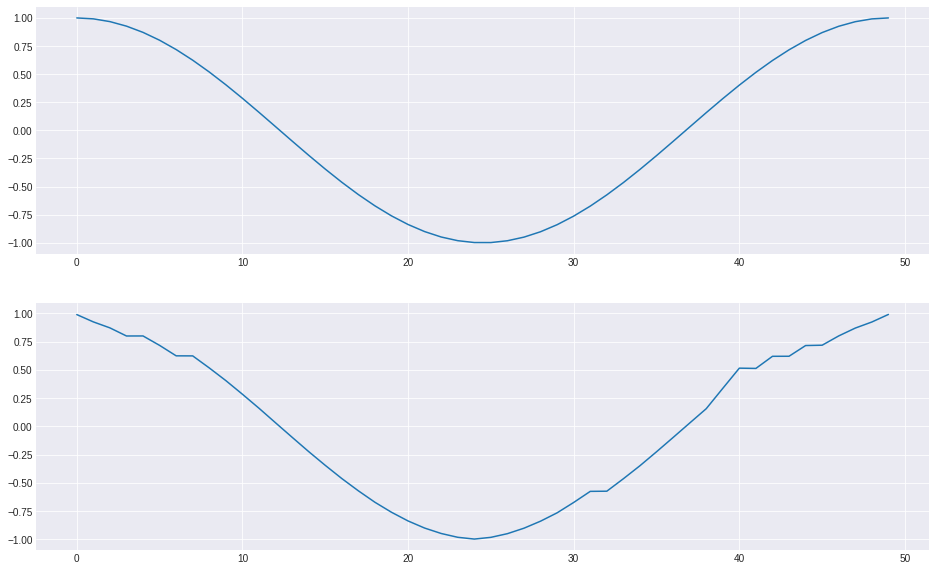

In [25]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10))
axs[0].plot(x.numpy().reshape(-1))
axs[1].plot(model(x.numpy()).numpy().reshape(-1))
plt.show()

## Greetings


---



In [15]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
